# Project Submission
### ```IMPORTANT PLEASE READ```
---

While creating our project, we had created multiple files with various diagrams and models. This allowed us to work many problems in parallel with each other, and save time running each notebook. Compiling every diagram and model into this file would have taken many hours to run and then export, as drawing diagrams and running large Grid Searches are very time extensive. 

Therefore, this submission file contains only the necessary highlights of all that we have done, including pictures of work that informed our decision making, all for the sake of time.

To support our claim, all of our supporting files can be found in the /supporting_notebooks directory.
* [project_1.ipynb](./supporting_notebooks/project_1.ipynb)
* [project_2.ipynb](./supporting_notebooks/project_2.ipynb)
* [project_3.ipynb](./supporting_notebooks/project_3.ipynb)
* [project_4.ipynb](./supporting_notebooks/project_4.ipynb)

Each of the above files also have pdf versions in the same directory. The files are not necessarily numbered in order, but represent our individual contributions.

For a more extensive textual description of our work, including individual contributions, look at [ProjectSubmission.md](ProjectSubmission.md).

For instructions on how to run this project, look at [README.md](README.md).

---
---

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns

c:\Users\Hunter\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("data/project_data.csv")
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# 1. Data Cleaning and Manipulation
---
---
### 1.1 Drop Null Values
---
1. Remove the column with majority NaN values
2. Use isnull() to figure out the number of NaN values per 

In [3]:
df.columns = df.columns.str.strip() # Many columns names have leading and trailing spaces. This removes those.
df.replace([np.inf, -np.inf], np.nan, inplace=True) # There is an infinity value hiding somewhere that needs removal
df.dropna(axis=0, inplace=True)
df.shape

(225711, 85)

### 1.2 Drop Unnecessary Columns
---
* Some columns are immediately noticeable as unecessary.
* These columns can be dropped without any concern for the data.

In [4]:
drop = ['Flow ID', 'Source IP', 'Destination IP', 'Source Port', 'Destination Port', 'Timestamp']
df.drop(columns=drop, inplace=True)
df.shape

(225711, 79)

### 1.3 Encode Label Column
---
* Change the labels from strings to integers

In [5]:
df['Label_encoded'] = df['Label'].map({'BENIGN': 0, 'DDoS': 1})
df.drop(columns=['Label'], inplace=True)
df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_encoded
0,6,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,6,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,6,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,6,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,6,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


### 1.4 Protocol Dummy Columns
---

In [6]:
df_dummies = pd.get_dummies(df, columns=['Protocol'], prefix=['Protocol'], prefix_sep='_')
df_dummies.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_encoded,Protocol_0,Protocol_6,Protocol_17
0,3,2,0,12,0,6,6,6.0,0.0,0,...,0,0,0.0,0.0,0,0,0,False,True,False
1,109,1,1,6,6,6,6,6.0,0.0,6,...,0,0,0.0,0.0,0,0,0,False,True,False
2,52,1,1,6,6,6,6,6.0,0.0,6,...,0,0,0.0,0.0,0,0,0,False,True,False
3,34,1,1,6,6,6,6,6.0,0.0,6,...,0,0,0.0,0.0,0,0,0,False,True,False
4,3,2,0,12,0,6,6,6.0,0.0,0,...,0,0,0.0,0.0,0,0,0,False,True,False


### 1.5 Top Features
---
Right or wrong, we figured that we had too many columns for a comfortable, reasonable anaylsis, so we determined to view only the most important features. This turned out to be a lucky mistake that uncovered other problems in the dataset later on.

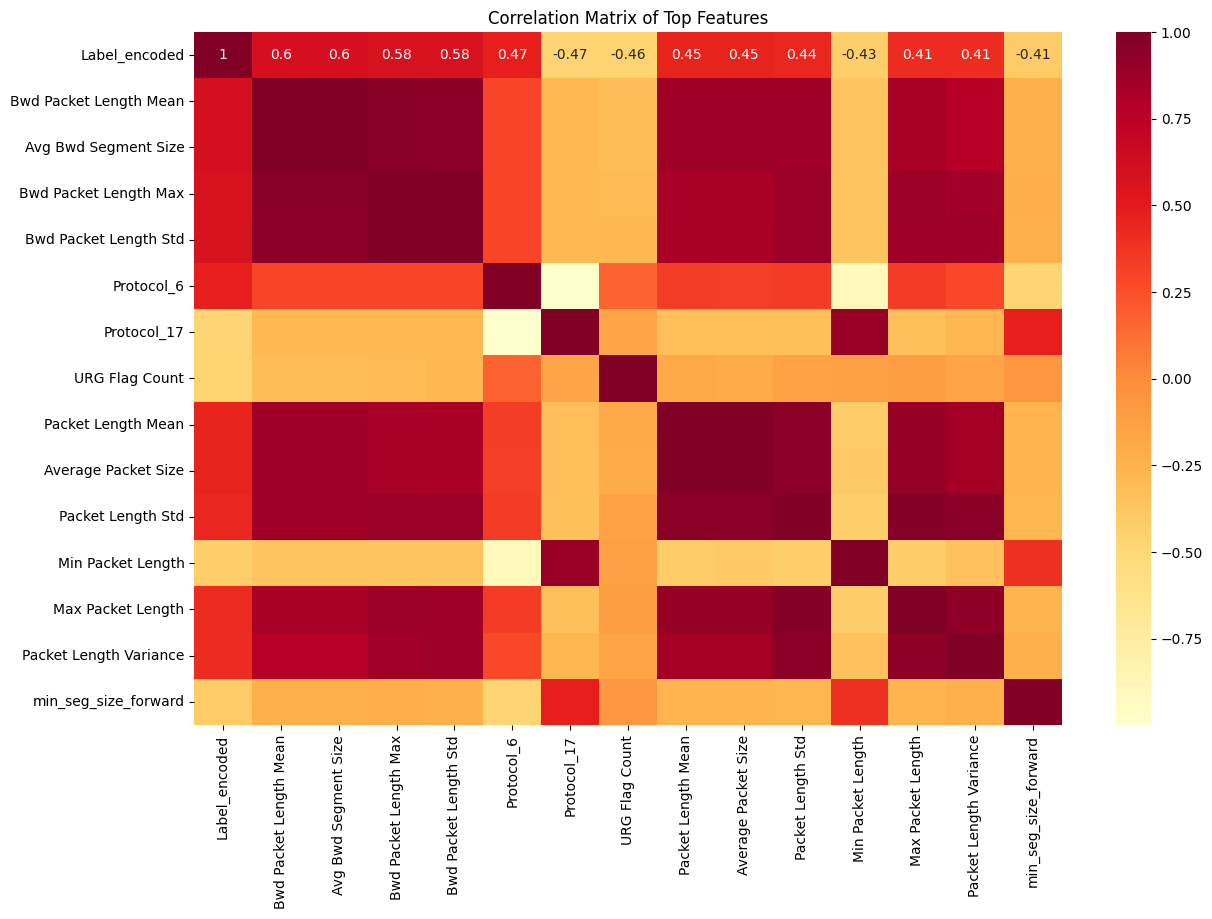

In [7]:
corr_matrix = df_dummies.corr().abs()
top_features = corr_matrix['Label_encoded'].sort_values(ascending=False).head(15).index
top_corr = df_dummies[top_features].corr()

plt.figure(figsize=(14, 9))
sns.heatmap(top_corr, annot=True, cmap='YlOrRd')
plt.title("Correlation Matrix of Top Features")
plt.show()

We're not sure why the above heatmap refuses to generate in this example, but below is a picture of a very similar heatmap.

![Heatmap](./images/heatmap.png)

### 1.6 Normalization - Standard Scaler
---
* The data needs to be normalized, as many features contain extremely large or extremely small values

In [8]:
df.describe()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_encoded
count,225711.000000,2.257110e+05,225711.000000,225711.000000,225711.000000,2.257110e+05,225711.000000,225711.000000,225711.000000,225711.000000,...,225711.000000,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,225711.000000
mean,7.600529,1.624410e+07,4.875389,4.573424,939.603147,5.961369e+03,538.615499,27.885810,164.850580,214.939117,...,21.482338,1.848539e+05,1.293631e+04,2.081162e+05,1.776468e+05,1.032370e+07,3.612487e+06,1.288007e+07,7.756523e+06,0.567208
std,3.881829,3.152612e+07,15.423986,21.756929,3249.628245,3.922122e+04,1864.258043,163.336194,504.927243,797.466898,...,4.166228,7.979819e+05,2.102894e+05,9.002992e+05,7.843163e+05,2.185431e+07,1.275778e+07,2.692283e+07,1.983236e+07,0.495464
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,6.000000,7.123800e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.453164e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,6.000000,8.806652e+06,5.000000,5.000000,64.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,20.000000,1.879000e+03,0.000000e+00,1.879000e+03,1.863000e+03,8.241416e+06,0.000000e+00,8.254452e+06,7.423865e+06,1.000000
max,17.000000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08,1.000000


In [9]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_standard_scaled_data = standard_scaler.fit_transform(df_dummies)
df_standard_scaled = pd.DataFrame(df_standard_scaled_data, columns=df_dummies.columns)
df_standard_scaled.drop(columns=['Label_encoded'], inplace=True)
df_standard_scaled['Label_encoded'] = df_dummies['Label_encoded']
df_standard_scaled.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_0,Protocol_6,Protocol_17,Label_encoded
count,2.257110e+05,2.257110e+05,225711.000000,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,...,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,225677.000000
mean,2.014733e-17,-1.259208e-17,0.000000,-2.115469e-17,7.681169e-18,-1.208840e-17,-1.385129e-17,-1.480829e-16,-2.065101e-17,3.022099e-17,...,1.259208e-18,2.518416e-18,2.014733e-17,3.827992e-17,4.331675e-17,2.316943e-17,1.561418e-17,-2.175911e-16,-1.813260e-16,0.567293
std,1.000002e+00,1.000002e+00,1.000002,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.495452
min,-5.152595e-01,-2.512579e-01,-0.210206,-2.891424e-01,-1.519938e-01,-2.889175e-01,-1.707268e-01,-3.264846e-01,-2.695279e-01,-7.384101e-01,...,-2.311639e-01,-2.264995e-01,-4.723884e-01,-2.831602e-01,-4.784081e-01,-3.911053e-01,-1.546936e-02,-2.419774e+00,-4.128648e-01,0.000000
25%,-5.129998e-01,-1.864236e-01,-0.164243,-2.811414e-01,-1.519938e-01,-2.856990e-01,-1.707268e-01,-3.146016e-01,-2.695279e-01,-7.384101e-01,...,-2.311639e-01,-2.264995e-01,-4.723884e-01,-2.831602e-01,-4.784081e-01,-3.911053e-01,-1.546936e-02,4.132617e-01,-4.128648e-01,0.000000
50%,-4.691654e-01,-1.215894e-01,-0.026356,-2.799105e-01,-1.478124e-01,-2.781893e-01,-1.707268e-01,-3.093203e-01,-2.628794e-01,-7.116913e-01,...,-2.311639e-01,-2.264995e-01,-4.723884e-01,-2.831602e-01,-4.784081e-01,-3.911053e-01,-1.546936e-02,4.132617e-01,-4.128648e-01,1.000000
75%,-2.359142e-01,8.079037e-03,0.019607,-2.694478e-01,1.437906e-01,-2.706796e-01,-1.339927e-01,-2.631089e-01,-2.566581e-01,8.377337e-01,...,-2.290768e-01,-2.241242e-01,-9.528037e-02,-2.831602e-01,-1.718106e-01,-1.677355e-02,-1.546936e-02,4.132617e-01,-4.128648e-01,1.000000
max,3.291115e+00,1.249436e+02,135.011381,5.602881e+01,1.317245e+02,5.976324e+00,8.841380e+00,7.332062e+00,8.122870e+00,2.413877e+00,...,1.108433e+02,1.272734e+02,5.018532e+00,4.835298e+00,3.978786e+00,5.659625e+00,6.464390e+01,4.132617e-01,2.422100e+00,1.000000


In [10]:
df_standard_scaled.dropna(axis=0, inplace=True)
df_standard_scaled['Label_encoded'].unique()
df_standard_scaled.shape

(225677, 81)

### 1.7 Pairplots - Code can be found in project_4.ipynb
---
* The Pairplots of top correlated features

![Pairplot/All in One graph](./images/pairplots/Pairplots_1.png)

* Implemented script to generate pairplots for subsets of top correlated features with the Label_encoded, with each graph displaying three features.


![Pairplot_1_](./images/pairplots/pairplots_2.png)

![Pairplot_1_](./images/pairplots/pairplots_3.png)

![Pairplot_1_](./images/pairplots/pairplots_4.png)

![Pairplot_1_](./images/pairplots/pairplots_5.png)

![Pairplot_1_](./images/pairplots/pairplots_6.png)

![Pairplot_1_](./images/pairplots/pairplots_7.png)

![Pairplot_1_](./images/pairplots/pairplots_8.png)

![Pairplot_1_](./images/pairplots/pairplots_9.png)

![Pairplot_1_](./images/pairplots/pairplots_10.png)

![Pairplot_1_](./images/pairplots/pairplots_11.png)

![Pairplot_1_](./images/pairplots/pairplots_12.png)

![Pairplot_1_](./images/pairplots/pairplots_14.png)

![Pairplot_1_](./images/pairplots/pairplots_15.png)

![Pairplot_1_](./images/pairplots/pairplots_16.png)

![Pairplot_1_](./images/pairplots/pairplots_16.png)

![Pairplot_1_](./images/pairplots/pairplots_17.png)

![Pairplot_1_](./images/pairplots/pairplots_18.png)

# 2. Baseline Models
---
---


In [11]:
from sklearn.model_selection import train_test_split
y = df_standard_scaled['Label_encoded']
X = df_standard_scaled.drop(columns=['Label_encoded'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.1 Logistic Regression
---

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [13]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.994461183977313


c:\Users\Hunter\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


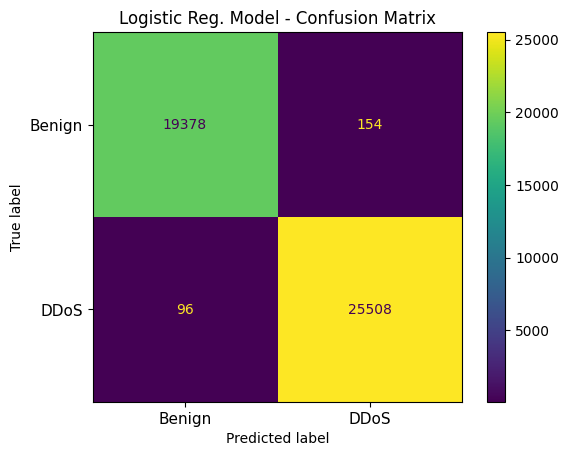

In [15]:
cm = ConfusionMatrixDisplay.from_estimator(clf,X_test, y_test)
#plt.figure()
#plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Reg. Model - Confusion Matrix")
plt.xticks(range(2), ["Benign","DDoS"], fontsize=11)
plt.yticks(range(2), ["Benign","DDoS"], fontsize=11)
plt.show()

### 2.2 K-Nearest Neighbors
---
Originally when running KNN, we ran it through a few iteration of k using a for-loop. In the below image, you can see the scores.

![KNN](./images/knn_baseline.png)

This took awhile to run, and the scores didn't change very much.

But, we did want to point out that the scores were very high early on, which we believed were cause for concern.

In [16]:
# A new run of KNN to show that it can score really high accuracies.
# Accuracy ended up higher than in our first run.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print("Train Score: ",knn.score(X_train,y_train), "Test Score: ",knn.score(X_test,y_test))

Train Score:  0.9964661766579337 Test Score:  0.9965880893300249


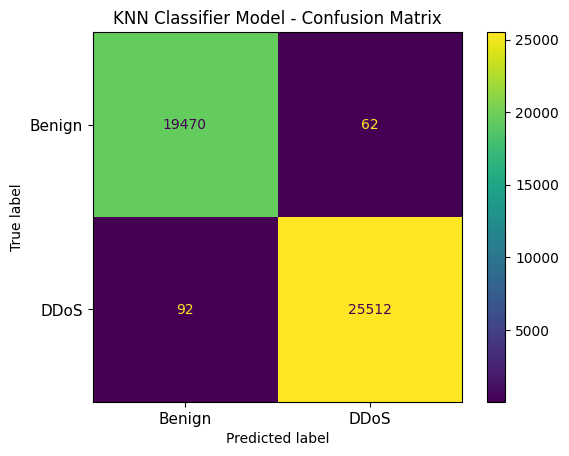

In [17]:
cm = ConfusionMatrixDisplay.from_estimator(knn,X_test, y_test)
#plt.figure()
#plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("KNN Classifier Model - Confusion Matrix")
plt.xticks(range(2), ["Benign","DDoS"], fontsize=11)
plt.yticks(range(2), ["Benign","DDoS"], fontsize=11)
plt.show()

### 2.3 Decision Tree Classifier
---

In [18]:
#Create Decision Tree Classifier
clf_1 = DecisionTreeClassifier(random_state = 30, criterion = 'entropy')

#Fit and Score Classifier Model
clf_1.fit(X_train, y_train)
clf_1.score(X_test, y_test)

0.9949707550514002

In [19]:
from sklearn.metrics import mean_squared_error

#Predict
y_1 = clf_1.predict(X_test)

#Calculate mean_squared_error
print(mean_squared_error(y_test, y_1))

0.005029244948599788


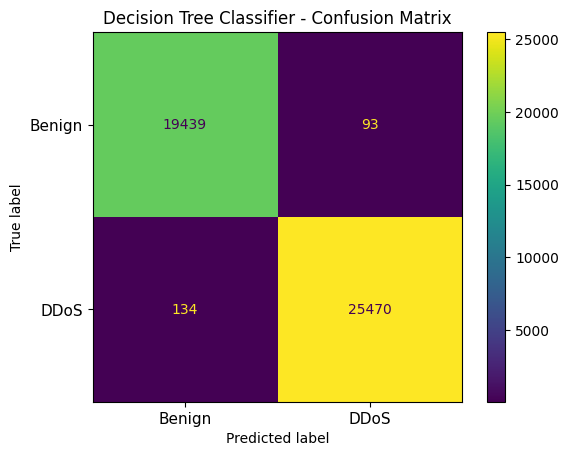

In [20]:
cm = ConfusionMatrixDisplay.from_estimator(clf_1, X_test, y_test)
plt.title("Decision Tree Classifier - Confusion Matrix")
plt.xticks(range(2), ["Benign","DDoS"], fontsize=11)
plt.yticks(range(2), ["Benign","DDoS"], fontsize=11)
plt.show()

### 2.4 Results of our Baseline Models
---
This early on in our evaluation, we were concerned about why we were getting accuracies so high. We weren't sure if we had overfit, or if there were other problems occuring. All we had really done was normalize the data, take an arbitrary number of features, then purposefully ran early models to see what would happen. We weren't convinced we were finished, and needed to explore further.

# 3. Problems with the Dataset
---
---

In [21]:
print(f'Dataframe number of rows    : {len(df)}')
ddos_rows = df[(df['Label_encoded'] == 1)]
tcp_rows = df[(df['Protocol'] == 6)]
udp_rows = df[(df['Protocol'] == 17)]
ddos_tcp_rows = df[(df['Label_encoded'] == 1) & (df['Protocol'] == 6)]
ddos_udp_rows = df[(df['Label_encoded'] == 1) & (df['Protocol'] == 17)]
print(f'Number of rows that are DDoS: {len(ddos_rows)} --> {len(ddos_rows)/len(df)*100:.2f}%')
print(f'Number of rows that are TCP : {len(tcp_rows)} --> {len(tcp_rows)/len(df)*100:.2f}%')
print(f'Number of rows that are UDP : {len(udp_rows)} --> {len(udp_rows)/len(df)*100:.2f}%')
print(f'Number of rows that are TCP and DDoS: {len(ddos_tcp_rows)}')
print(f'Number of rows that are UDP and DDoS: {len(ddos_udp_rows)}')
print('\nCONCERN: All rows labeled DDoS ARE also TCP')

Dataframe number of rows    : 225711
Number of rows that are DDoS: 128025 --> 56.72%
Number of rows that are TCP : 192786 --> 85.41%
Number of rows that are UDP : 32871 --> 14.56%
Number of rows that are TCP and DDoS: 128025
Number of rows that are UDP and DDoS: 0

CONCERN: All rows labeled DDoS ARE also TCP


### 3.1 Features that were Essentially Labels
---
Taking some more observations, it turns out there was a bad split between TCP and UDP data.

All the rows labelled DDoS happen to only be labelled TCP, and none of them are labelled UDP. We began to realize that some of the columns in the dataset were essentially labels themselves, or had a high probability of giving away a label. We started performing a manual review of features, and began dropping the features with the highest correlation to the DDoS label, starting with the Protocol column. This is a correction of what we attempted at first, where we sought only the strongest correlating features.

### 3.2 Correcting Early Mistakes
---
At the beginning, we had mistakenly looked at correlations too early. We had figured that, with so many columns, surely they would not all be strongly correlated. It turns out, as we continued dropping features, that very many of the features had a very strong correlation with the label. By the end of our work, we had dropped almost all the features in favor of a select few, which we will explain later.

In a show of some feature importances, the below image is an example of a feature taking up 100% of the importance in a model. Many features were like this, and the removal of such a feature would often allow another feature to take up near 100% importance.

![Fwd Packet Length Max 100](./images/fwd_pkt_length_max_100.png)

While continuing to run Decision Trees, the existence of these strongly correlated features would guarantee 99.9% accuracy in almost every model. 

![Fwd Packet Length Max 57](./images/fwd_pkt_length_max_57.png)

With some minor adjustments to the Decision Tree, we were able to get a marginal improvement on feature importance, but instead of 1 feature dominating the set, it would be 2 or 3 features out of nearly 80 providing a correct prediction of the target class.





### 3.3 Manual Feature Extraction
---
We manually created many Decision Tree models, and started removing 1 or 2 features at a time, and later removing them in batches. Important features would be removed, and we continued removing features until our accuracy dropped below 90%. As we removed features, features that previously had no importance would suddenly gain the market share of importance. Notice the features below in the image: all of these features had 0% importance a few models ago, but now one feature has over 50% importance, meaning there are still very many features given little to no importance.

![Down/Up Ratio](./images/init_win_bytes.png)

Accuracy did not fall below 90% until only 20 features remained. At this point, a large drop in accuracy occured, where the accuracy was now only 65%.

![Accuracy 1](./images/accuracy_1.png)
![Accuracy 2](./images/accuracy_2.png)

The below image is the image preceding the large drop in accuracy.

![Accuracy 3](./images/accuracy_3.png)

The below image displays the sharp drop in accuracy.

![Accuracy 4](./images/accuracy_4.png)

The features listed in the above image are the only features that remain from the 85 original features, totalling 19 features.

# 4. Reintroducing Features
---
---
### 4.1 Focusing our Goal
---
We had originally tried taking the highest correlating features to detect DDoS attacks. However, a well-crafted DDoS attack attempts to avoid detection, with some crafted so well as to reduce detection rates to below 50%!

We realized we needed to scrape the dataset for obscure, unavoidable features that identify all DDoS attacks.
1) **```Protocol Agnostic```** DDoS attacks aren't necessarily reliant on being TCP, UDP, or ICMP, so features relating specifically to these protocols can be dropped. (i.e. there are a number of "flag" columns which would only be associated with TCP traffic)
2) **```Drop easily identifiable features```** A feature with high importance is likely a giveaway of an attack occuring. Skilled attackers will know this and seek to minimize these features.
3) **```Search for Obscure Features```** Obscure features that can identify attacks are likely being hidden in the dataset by the "giveaway" features.

### 4.2 Examples of Feature Importances
---
While dropping and reintroducing features, we spent a lot of time looking at feature importances. We weren't looking to tune any models until we were sure our features had a good spread of importance, and that each of our chosen features followed the new rules we had set above. For example, any feature with the "flag" identifier only relates to the TCP Protocol feature. UDP packets don't have flags. Even if they only had a small importance and provided a small percentage towards the identifying the target class, we chose to remove these anyway in favor of finding "**Protocol Agnostic**" features.

#### 4.2.1 Starting from the top
---
Restarting our evaluation from near the beginning, we started by switching to a MinMaxScaler, which we believed would be more useful than the StandardScaler.

In [22]:
from sklearn.preprocessing import MinMaxScaler
df.drop(columns=['Protocol'], inplace=True)
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)
original_normalized_df = pd.DataFrame(normalized_df, columns=normalized_df.columns) # this is to save the normalized_df for later. The normalized_df has columns dropped in place a lot
normalized_df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_encoded
0,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,0.000000,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.166671e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,0.000514,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.416669e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,0.000514,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.916668e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,0.000514,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,0.000000,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
normalized_df.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_encoded
count,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,...,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000
mean,0.135368,0.002007,0.001555,0.005134,0.001153,0.046114,0.018944,0.042630,0.032116,0.234246,...,0.413122,0.001849,0.000328,0.002081,0.001776,0.086031,0.055321,0.107334,0.064638,0.567208
std,0.262718,0.007988,0.007395,0.017756,0.007583,0.159611,0.110962,0.130573,0.119156,0.317231,...,0.080120,0.007980,0.005324,0.009003,0.007843,0.182119,0.195372,0.224357,0.165270,0.495464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000594,0.000518,0.000340,0.000142,0.000000,0.000514,0.000000,0.001552,0.000000,0.000000,...,0.384615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.012110,0.001036,0.001360,0.000164,0.000032,0.001712,0.000000,0.002241,0.000792,0.008476,...,0.384615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.073389,0.002071,0.001700,0.000350,0.002243,0.002911,0.004076,0.008275,0.001534,0.500000,...,0.384615,0.000019,0.000000,0.000019,0.000019,0.068678,0.000000,0.068787,0.061866,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# This is to maintain the original normalized dataframe so we can reintroduce features
original_normalized_df = pd.DataFrame(normalized_df, columns=normalized_df.columns)

In [25]:
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)
tree_classifier = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=42, criterion='gini')
tree_classifier.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=42)

In [26]:
from sklearn.metrics import accuracy_score
ypred = tree_classifier.predict(Xtest)
tree_acc = accuracy_score(ytest, ypred)
print(f'Accuracy: {tree_acc}')

Accuracy: 0.9994019006268967


In [27]:
tree_feature_importances = pd.DataFrame(tree_classifier.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(tree_feature_importances)

                        importance
Fwd Packet Length Max     0.573896
Subflow Fwd Bytes         0.420578
Init_Win_bytes_forward    0.002326
Bwd Packet Length Mean    0.000855
Flow IAT Std              0.000449
...                            ...
Total Fwd Packets         0.000000
Packet Length Mean        0.000000
Packet Length Std         0.000000
Packet Length Variance    0.000000
Idle Min                  0.000000

[77 rows x 1 columns]


#### 4.2.2 Dimensionality Reduction
---
Below is a compilation of all the different times we dropped features. Each time we dropped columns, we had created another model to run and then re-examined the feature importances. A more substantial amount of the code can be found in [project_3.ipynb](./supporting_notebooks/project_3.ipynb) or the pdf version [project_3.pdf](./supporting_notebooks/project_3.pdf).

Notice below that we had called .drop() 11 different times. This represents 11 different Decision Tree Classifiers we had modeled with the changes in the feature set.

In [28]:
# Each of these lines represents a new Decision Tree model that was created after some features had been dropped.

normalized_df.drop(columns=['Fwd Packet Length Max', 'Subflow Fwd Bytes'], inplace=True)
normalized_df.drop(columns=['Fwd Packet Length Mean', 'Total Length of Fwd Packets'], inplace=True)
normalized_df.drop(columns=['Avg Fwd Segment Size', 'act_data_pkt_fwd'], inplace=True)
normalized_df.drop(columns=['Init_Win_bytes_forward', 'Fwd Packet Length Std'], inplace=True)
normalized_df.drop(columns=['Subflow Fwd Packets', 'Init_Win_bytes_backward'], inplace=True)
normalized_df.drop(columns=['Total Fwd Packets', 'Bwd Header Length'], inplace=True)

drop_columns = ['Total Backward Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Min',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std']
normalized_df.drop(columns=drop_columns, inplace=True)

normalized_df.drop(columns=['Fwd Header Length', 'Fwd Header Length.1', 'Subflow Bwd Packets', 'Avg Bwd Segment Size', 'Subflow Bwd Bytes'], inplace=True)
normalized_df.drop(columns=['Average Packet Size', 'Fwd IAT Std', 'Packet Length Std', 'Packet Length Mean', 'Down/Up Ratio', 'Bwd IAT Total', "Flow IAT Std", 'Fwd IAT Total'], inplace=True)

drop_columns = ['Packet Length Variance', 'Fwd IAT Max', 'Bwd IAT Max', 'Fwd IAT Min', 'Fwd IAT Mean', 'Max Packet Length', 'Bwd IAT Std', 'URG Flag Count', 'Bwd IAT Mean', 
                'Min Packet Length']
normalized_df.drop(columns=drop_columns, inplace=True)

drop_columns = ['Fwd Packets/s', 'Active Max', 'min_seg_size_forward', 'Bwd Packets/s', 'Flow IAT Min', 'Idle Mean', 'Flow IAT Mean',
                'PSH Flag Count', 'ACK Flag Count', 'Fwd PSH Flags', 'Flow Duration', 'Active Min', 'Flow IAT Max', 'Flow Bytes/s',
                'Active Mean', 'Flow Packets/s']
normalized_df.drop(columns=drop_columns, inplace=True)
normalized_df.shape

(225711, 20)

After many models, and dropping all of the above features, we finally reached a point where the accuracy dropped dramatically. 

In [29]:
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

tree_classifier_12 = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=42, criterion='gini')
tree_classifier_12.fit(Xtrain, ytrain)

ypred = tree_classifier_12.predict(Xtest)
tree_acc_12 = accuracy_score(ytest, ypred)
print(f'Accuracy: {tree_acc_12}')

tree_feature_importances = pd.DataFrame(tree_classifier_12.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(tree_feature_importances)

Accuracy: 0.6414948053961854
                      importance
SYN Flag Count          0.332176
Idle Max                0.254301
Active Std              0.252492
Bwd IAT Min             0.124185
FIN Flag Count          0.019095
Idle Min                0.017751
RST Flag Count          0.000000
CWE Flag Count          0.000000
ECE Flag Count          0.000000
Bwd PSH Flags           0.000000
Fwd Avg Packets/Bulk    0.000000
Fwd Avg Bulk Rate       0.000000
Bwd Avg Bytes/Bulk      0.000000
Bwd Avg Packets/Bulk    0.000000
Bwd Avg Bulk Rate       0.000000
Bwd URG Flags           0.000000
Idle Std                0.000000
Fwd URG Flags           0.000000
Fwd Avg Bytes/Bulk      0.000000


### 4.3 Improvement Baseline -- Random Forest Classifier
---
After running many Decision Tree models and dropping most of the features, we wanted to try to see if we could use a more powerful model to generate better results. We tried to see if an ensembling technique would be able to improve the accuracy. We picked a Random Forest Classifier as our improvement baseline.

In [30]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest.fit(Xtrain, ytrain)
ypred = forest.predict(Xtest)
print(accuracy_score(ytest, ypred))

forest_importances = pd.DataFrame(forest.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(forest_importances)

0.6539662849168199
                      importance
SYN Flag Count          0.244980
Idle Max                0.187789
Idle Min                0.176200
Bwd IAT Min             0.174555
Active Std              0.151145
Idle Std                0.051347
FIN Flag Count          0.013153
ECE Flag Count          0.000432
RST Flag Count          0.000398
Bwd URG Flags           0.000000
CWE Flag Count          0.000000
Bwd PSH Flags           0.000000
Fwd Avg Packets/Bulk    0.000000
Fwd Avg Bulk Rate       0.000000
Bwd Avg Bytes/Bulk      0.000000
Bwd Avg Packets/Bulk    0.000000
Bwd Avg Bulk Rate       0.000000
Fwd URG Flags           0.000000
Fwd Avg Bytes/Bulk      0.000000


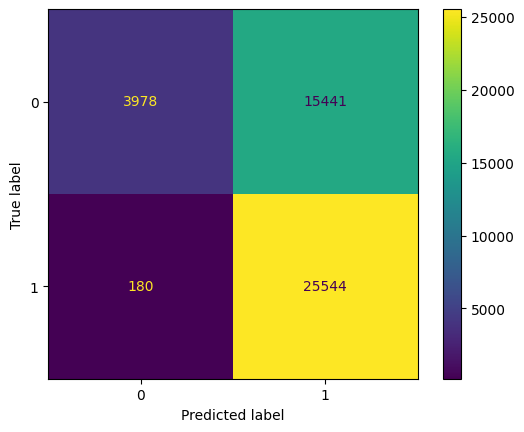

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
matrix = confusion_matrix(ytest, ypred)
cm = ConfusionMatrixDisplay(confusion_matrix=matrix)
cm.plot()

The Random Forest did not increase the accuracy. It seemed to be able to predict DDoS attacks just fine, but it could no longer identify what normal traffic looked like. The accuracy score seems to be trivialized by the true positive, as almost all network flows are now considered DDoS.

We made another attempt to start fixing the classifier by setting n_estimators, the criterion to gini, and class_weight to balanced so that we could get a better balance between the features.

In [32]:
forest_2 = RandomForestClassifier(n_estimators=500, criterion='gini', class_weight='balanced')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_2.fit(Xtrain, ytrain)
ypred = forest_2.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.5985867133331857


However, our accuracy dropped even further while trying to tune the Random Forest. At this point, we decided to start selecting features to meet our criteria. This involved a continual process of dropping and reintroducing features.

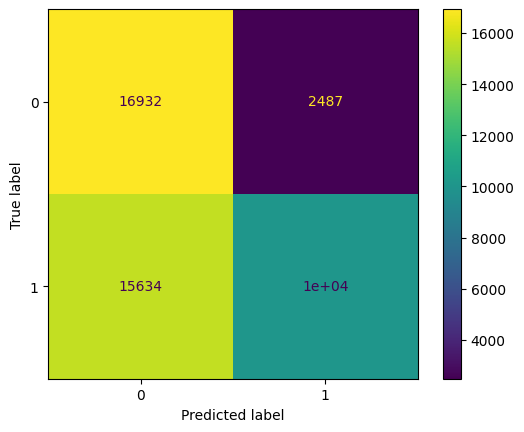

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
matrix = confusion_matrix(ytest, ypred)
cm = ConfusionMatrixDisplay(confusion_matrix=matrix)
cm.plot()

### 4.4 Choosing Features to Introduce
---
We chose to reintroduce features by groups, and chose features labelled IAT (Interarrival Time). The interarrival time of packets is not dependent on protocol. Any DDoS attack will seek to flood a network/target resource with many packets despite the protocol. After reintroducing the four Flow IAT features, accuracy climbed back up to above 90%. Most of these features were also not present in the top correlated features, and often scored low in feature importances.

In [34]:
normalized_df['Flow IAT Mean'] = original_normalized_df['Flow IAT Mean'] # Add one column and see what happens
normalized_df['Flow IAT Std'] = original_normalized_df['Flow IAT Std'] # Add one column and see what happens
normalized_df['Flow IAT Max'] = original_normalized_df['Flow IAT Max'] # Add one column and see what happens
normalized_df['Flow IAT Min'] = original_normalized_df['Flow IAT Min'] # Add one column and see what happens

forest_3 = RandomForestClassifier(n_estimators=500, criterion='gini', class_weight='balanced')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_3.fit(Xtrain, ytrain)
ypred = forest_3.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.9505128148328644


The Flow IAT features also have a good spread of feature importance between them.

In [35]:
forest_3_importances = pd.DataFrame(forest_3.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(forest_3_importances)

                      importance
Flow IAT Mean           0.258137
Flow IAT Std            0.253251
Flow IAT Max            0.207739
Flow IAT Min            0.062753
SYN Flag Count          0.052708
Bwd IAT Min             0.046528
Active Std              0.037526
Idle Max                0.036709
Idle Min                0.028700
Idle Std                0.015053
FIN Flag Count          0.000679
RST Flag Count          0.000111
ECE Flag Count          0.000108
Fwd URG Flags           0.000000
Bwd URG Flags           0.000000
Bwd Avg Bulk Rate       0.000000
CWE Flag Count          0.000000
Bwd Avg Packets/Bulk    0.000000
Bwd Avg Bytes/Bulk      0.000000
Bwd PSH Flags           0.000000
Fwd Avg Packets/Bulk    0.000000
Fwd Avg Bytes/Bulk      0.000000
Fwd Avg Bulk Rate       0.000000


Text(0.5, 1.0, 'Random Forest Classifier')

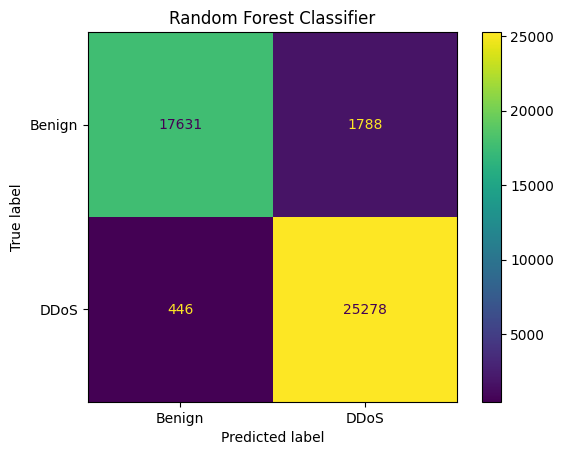

In [36]:
matrix = confusion_matrix(ytest, ypred)
cm = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['Benign', 'DDoS'])
cm.plot()
plt.title(label='Random Forest Classifier')

In [37]:
tn, fp, fn, tp = matrix.ravel()

recall = tp/(tp + fn) * 100
precision = tp/(tp+fp) * 100
f1_score = 2 * ((precision * recall) / (precision + recall))
accuracy = accuracy_score(ytest, ypred)
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1_score}')
print(f'Accuracy: {accuracy}')

Recall: 98.26621054268388
Precision: 93.39392595876745
F1 Score: 95.76813790490623
Accuracy: 0.9505128148328644


### 4.5 Analyzing the Results after some Reintroduction
---
#### Reintroduction
The reintroduction of even just 4 features brought the accuracy back up to 95%.

#### False Negatives --- Dangerous!
False Negatives are the most dangerous value in our dataset. In a real environment, these represent DDoS attack flows that are being permitted through defense mechanisms without detection.\
This value should be reduced as low as possible to ensure defense of a network. Thankfully, our model already appears to have a low number of false negatives, but we would like to test if they could be reduced further.

#### False Positives --- Annoying
False Positives are the Benign classes being labelled as DDoS. Although this does not represent a true threat to a target resource, the model will be "paranoid" that actual attacks are occuring.\
In a real environment, this could cause defense mechanisms to be overreactive and make personnel spend resources on something that is not a problem.

#### Playing with the Model
Our recall was pretty good, but the precision needs work. We decided that working with the model parameters to increase its results would be the way to go. We created many Random Forests, and even started using Gradient Boosting Classifiers. We even ran these in a GridSearch (that we don't want to replicate).

![Grid Searches](./images/grid_searches_1.png)

The Grid Searches only yielded marginal improvement. So we went back to feature extraction and reintroduction to clean up what features the models should rely on.

In [38]:
normalized_df.columns

Index(['Bwd IAT Min', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'CWE Flag Count',
       'ECE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
       'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Active Std', 'Idle Std', 'Idle Max', 'Idle Min',
       'Label_encoded', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min'],
      dtype='object')

```Important Point```
After much work dropping and reintroducing different features, we were left with only 16 features of the original 85. Although the below code does this in a couple steps, it was actually very many steps through [project_3.ipynb](./supporting_notebooks/project_3.ipynb), which was performed in about 20 different iterations of Random Forest Classifiers.

In [39]:
drop = ['Bwd IAT Min', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'CWE Flag Count',
       'ECE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
       'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Active Std', 'Idle Std', 'Idle Max', 'Idle Min',
       'Label_encoded']
normalized_df.drop(columns=drop, inplace=True)

add = ['Active Mean', 'Active Max', 'Active Min', 'Flow IAT Min', 'Idle Min', 'Flow Packets/s', 'Idle Mean', 'Idle Max', 
       'Active Std', 'Idle Std']

normalized_df[add] = original_normalized_df[add]
normalized_df.columns

Index(['Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Active Mean', 'Active Max', 'Active Min', 'Idle Min', 'Flow Packets/s',
       'Idle Mean', 'Idle Max', 'Active Std', 'Idle Std'],
      dtype='object')

In [40]:
normalized_df['Flow Duration'] = original_normalized_df['Flow Duration']
normalized_df['Flow Bytes/s'] = original_normalized_df['Flow Bytes/s']
normalized_df.shape

(225711, 15)

In [41]:
# Accidentally dropped the label column
normalized_df['Label_encoded'] = original_normalized_df['Label_encoded']

### 4.6 Problems Reintroducing Features

Many single features we introduced would immediately increase accuracy to 99% in the current model.

For example, the Down/Up Ratio feature had 0 importance early on:

![Down-Up-Ratio](./images/down-up-ratio-0.png)

But when reintroduced, it would have the greatest feature importance, and our accuracy would greatly increase, so we chose to avoid it:

![Down-Up-Ratio](./images/down-up-ratio-24.png)

Eventually, after playing with many different features, we found a sweetspot where we were able to incrementally add features without getting too high of an accuracy.

```Sweetspot```
* Flow IAT Std     
* Flow Duration    
* Flow IAT Mean     
* Flow IAT Max      
* Flow Bytes/s      
* Active Mean       
* Active Max        
* Active Min       
* Flow IAT Min      
* Idle Min          
* Flow Packets/s    
* Idle Mean         
* Idle Max         
* Active Std        
* Idle Std


## 5. Tuning Classifiers
---
---
Our Random Forest Classifier was performing well. We wanted to tune parameters of the Random Forest, as well as attempt to implement a Gradient Boosting Classifier to see if we could tune it to outperform the Random Forest.

### 5.1 Random Forest vs. Gradient Boosting
---

In [42]:
# Yes, we created 22 different random forests to test the reintroduction of features

forest_22 = RandomForestClassifier(n_estimators=500, criterion='entropy', class_weight='balanced_subsample')
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

forest_22.fit(Xtrain, ytrain)
ypred = forest_22.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.9657089692754137


Text(0.5, 1.0, 'Random Forest Classifier')

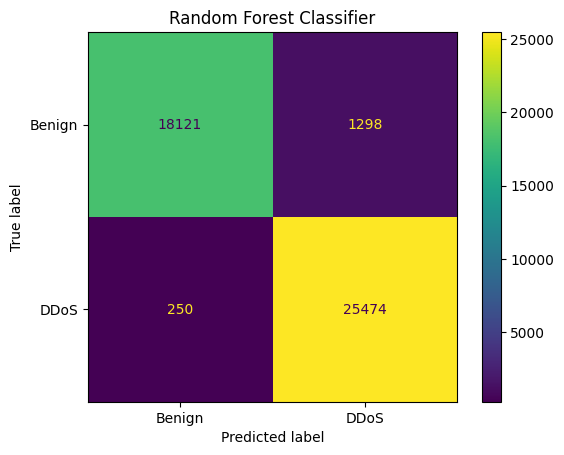

In [43]:
matrix = confusion_matrix(ytest, ypred)
cm = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['Benign', 'DDoS'])
cm.plot()
plt.title(label='Random Forest Classifier')

In [44]:
tn, fp, fn, tp = matrix.ravel()

recall = tp/(tp + fn) * 100
precision = tp/(tp+fp) * 100
f1_score = 2 * ((precision * recall) / (precision + recall))
accuracy = accuracy_score(ytest, ypred)
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1_score}')
print(f'Accuracy: {accuracy}')

Recall: 99.02814492302909
Precision: 95.1516509786344
F1 Score: 97.05120390124962
Accuracy: 0.9657089692754137


In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf9 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.3, subsample=1)
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

gb_clf9.fit(Xtrain, ytrain)
ypred = gb_clf9.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.9569811487938329


Text(0.5, 1.0, 'Gradient Boosting Classifier')

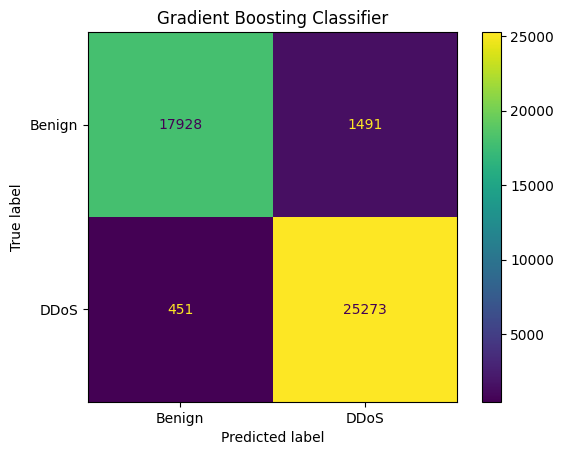

In [46]:
matrix = confusion_matrix(ytest, ypred)
cm = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['Benign', 'DDoS'])
cm.plot()
plt.title(label='Gradient Boosting Classifier')

In [47]:
tn, fp, fn, tp = matrix.ravel()

recall = tp/(tp + fn) * 100
precision = tp/(tp+fp) * 100
f1_score = 2 * ((precision * recall) / (precision + recall))
accuracy = accuracy_score(ytest, ypred)
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1_score}')
print(f'Accuracy: {accuracy}')

Recall: 98.24677344114446
Precision: 94.42908384396951
F1 Score: 96.30010669105319
Accuracy: 0.9569811487938329


### 5.2 Results and further tuning
---
Initially, the Random Forest outperformed the Gradient Boosting classifier. However, each generate a good Recall, but their Precisions could both be better.

We decided to run some Grid Searches for the Gradient Boosting classifier to see if we could tune the parameters to outperform the Random Forest.

![GB Grid Search](./images/grid_searches_2.png)

Ran the grid search in two iterations to save time.

![GB Grid Search](./images/grid_searches_3.png)

The improvements from the Grid Search only made marginal improvements on the Gradient Boosting Classifier, with an accuracy just below 96%.

In [49]:
gb_r = GradientBoostingClassifier(n_estimators=750, learning_rate=0.3, max_depth=3, min_samples_split=4, subsample=0.75)
y = normalized_df['Label_encoded']
X = normalized_df.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

gb_r.fit(Xtrain, ytrain)
ypred = gb_r.predict(Xtest)
print(accuracy_score(ytest, ypred))

0.9587311432558757


## 6. Conclusion
---
---


In [54]:
best_forest = forest_22
best_gb = gb_r

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)
best_forest_ypred = best_forest.predict(Xtest)
best_gb_ypred = best_gb.predict(Xtest)

f_matrix = confusion_matrix(ytest, best_forest_ypred)
f_tn, f_fp, f_fn, f_tp = f_matrix.ravel() # forest matrix
f_recall = f_tp/(f_tp + f_fn) * 100
f_precision = f_tp/(f_tp+f_fp) * 100
f_f1_score = 2 * ((f_precision * f_recall) / (f_precision + f_recall))
f_accuracy = accuracy_score(ytest, best_forest_ypred) * 100

g_matrix = confusion_matrix(ytest, best_gb_ypred)
g_tn, g_fp, g_fn, g_tp = g_matrix.ravel() # forest matrix
g_recall = g_tp/(g_tp + g_fn) * 100
g_precision = g_tp/(g_tp+g_fp) * 100
g_f1_score = 2 * ((g_precision * g_recall) / (g_precision + g_recall))
g_accuracy = accuracy_score(ytest, best_gb_ypred) * 100


print("Best Random Forest Results")
print(f'Recall: {f_recall}')
print(f'Precision: {f_precision}')
print(f'F1 Score: {f_f1_score}')
print(f'Accuracy: {f_accuracy}')
print()
print("Best Gradient Boosting Results")
print(f'Recall: {g_recall}')
print(f'Precision: {g_precision}')
print(f'F1 Score: {g_f1_score}')
print(f'Accuracy: {g_accuracy}')

Best Random Forest Results
Recall: 99.02814492302909
Precision: 95.1516509786344
F1 Score: 97.05120390124962
Accuracy: 96.57089692754137

Best Gradient Boosting Results
Recall: 98.31285958637848
Precision: 94.65174594857592
F1 Score: 96.44757164921917
Accuracy: 95.87311432558757


## Results
Ultimately, the Random Forest Classifier outperforms the Gradient Boosting Classifier. Perhaps there might be better parameters to further tune the Gradient Boosting Classifier, but these will be costly to find with only marginal improvements.

### What did not work
Starting the project by looking at the top correlating features was a terrible idea. Although it helped us to discover how we should actually approach the project, a different approach might have gotten us there more quickly. 

### What do you think why?
We had stated that we wanted to search for subtle features to distinguish DDoS traffic from Benign traffic. The top correlating features were the opposite of what we wanted, as these were the least subtle, most prominent giveaways of a DDoS attack.

### What were approaches, tuning model parameters you have tried?
After taking the approach to manually determine our desired features, we tried tuning our Random Forests and Gradient Boosting Classifiers by adjusting n_estimators, max_depth, class_weight, learning_rate, and subsamples (to make the Gradient Boosting Classifier more Stochastic). We were able to get slightly better results as we tuned the classifiers.

### What features worked well and what didn't
Almost all of our features did not work well, by actually working too well.
Our 15 "sweetspot" features provided good results, even 99% Recall, without immediately giving away the label:

```Sweetspot```
* Flow IAT Std     
* Flow Duration    
* Flow IAT Mean     
* Flow IAT Max      
* Flow Bytes/s      
* Active Mean       
* Active Max        
* Active Min       
* Flow IAT Min      
* Idle Min          
* Flow Packets/s    
* Idle Mean         
* Idle Max         
* Active Std        
* Idle Std

### How was that a data-driven decision?
Our feature selection was data-driven in the case of, by analyzing the results and feature importances, we were able to discover features that provided strong results without giving away the label.

